In [141]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt

In [142]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [143]:
# Directory containing CSV files for each stock
directory = "dj"

# Initialize an empty list to store DataFrames for each stock
dfs = []

# Iterating over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        
        filepath = os.path.join(directory, filename)
        
        df = pd.read_csv(filepath)
        
        df['Stock Symbol'] = os.path.splitext(filename)[0]  # Extract stock symbol from filename
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenating all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Movements,Stock Symbol
0,13/02/2023,150.949997,154.259995,150.919998,153.850006,153.033173,62199000,2.900009,AAPL
1,14/02/2023,152.119995,153.770004,150.860001,153.199997,152.386597,61707600,1.080002,AAPL
2,15/02/2023,153.110001,155.500000,152.880005,155.330002,154.505280,65573800,2.220001,AAPL
3,16/02/2023,153.509995,156.330002,153.350006,153.710007,152.893890,68167900,0.200012,AAPL
4,17/02/2023,152.350006,153.000000,150.850006,152.550003,151.740067,59144100,0.199997,AAPL


In [148]:
features = data[['Close']]

In [149]:
from sklearn.impute import SimpleImputer

# Replace missing values (NaNs) with the mean of each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Initializing and fitting KMeans model
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(features_imputed)

# Initializing and fitting Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=5)
gmm_model.fit(features_imputed)


GaussianMixture(n_components=5)

In [150]:
# Predicting cluster labels using KMeans model
kmeans_labels = kmeans_model.predict(features_imputed)

# Predicting cluster labels using Gaussian Mixture Model (GMM)
gmm_labels = gmm_model.predict(features_imputed)

# Adding cluster labels to the DataFrame
data['KMeans Cluster'] = kmeans_labels
data['GMM Cluster'] = gmm_labels

# Displaying the first few rows of the DataFrame with cluster labels
print(data[['Stock Symbol', 'KMeans Cluster', 'GMM Cluster']].head())


  Stock Symbol  KMeans Cluster  GMM Cluster
0         AAPL               0            1
1         AAPL               0            1
2         AAPL               0            1
3         AAPL               0            1
4         AAPL               0            1


In [151]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Movements,Stock Symbol,KMeans Cluster,GMM Cluster
7495,05/02/2024,170.009995,170.009995,168.070007,168.660004,168.660004,6381700,-1.349991,WMT,0,1
7496,06/02/2024,168.789993,169.949997,168.339996,169.809998,169.809998,4727100,1.020005,WMT,0,1
7497,07/02/2024,170.270004,170.660004,169.199997,169.380005,169.380005,5694200,-0.889999,WMT,0,1
7498,08/02/2024,169.380005,170.550003,169.139999,169.369995,169.369995,4809300,-0.010010,WMT,0,1
7499,09/02/2024,169.389999,169.729996,168.919998,169.279999,169.279999,4776100,-0.110000,WMT,0,1


In [152]:
# Grouping DataFrame by KMeans cluster label and list stock symbols
kmeans_cluster_groups = data.groupby('KMeans Cluster')['Stock Symbol'].apply(list)

# Grouping DataFrame by GMM cluster label and list stock symbols
gmm_cluster_groups = data.groupby('GMM Cluster')['Stock Symbol'].apply(list)

# Displaying cluster groups
print("KMeans Cluster Groups:")
for cluster, stocks in kmeans_cluster_groups.items():
    print(f"Cluster {cluster}: {', '.join(stocks)}")

print("\nGMM Cluster Groups:")
for cluster, stocks in gmm_cluster_groups.items():
    print(f"Cluster {cluster}: {', '.join(stocks)}")


KMeans Cluster Groups:
Cluster 0: AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, AXP, 

In [153]:
# Function to assign each company to the cluster with the highest count
def assign_to_major_cluster(cluster_labels):
    cluster_counts = {}
    major_cluster = {}
    
    # Convert cluster_labels to a pandas Series
    cluster_series = pd.Series(cluster_labels)
    
    for label in set(cluster_labels):
        counts = cluster_series.value_counts()
        cluster_counts[label] = counts[label]
    
    for stock, label in zip(data['Stock Symbol'], cluster_labels):
        if stock not in major_cluster or cluster_counts[label] > cluster_counts[major_cluster[stock]]:
            major_cluster[stock] = label
    
    return major_cluster

# Assign each company to the major cluster for KMeans
kmeans_major_clusters = assign_to_major_cluster(kmeans_labels)

# Assign each company to the major cluster for GMM
gmm_major_clusters = assign_to_major_cluster(gmm_labels)

# Display major clusters
print("KMeans Major Clusters:")
for stock, cluster in kmeans_major_clusters.items():
    print(f"Cluster {cluster}: {stock}")



KMeans Major Clusters:
Cluster 0: AAPL
Cluster 4: AMGN
Cluster 0: AXP
Cluster 4: BA
Cluster 4: CAT
Cluster 0: CRM
Cluster 2: CSCO
Cluster 0: CVX
Cluster 0: DIS
Cluster 2: DOW
Cluster 1: GS
Cluster 1: HD
Cluster 0: HON
Cluster 0: IBM
Cluster 2: INTC
Cluster 0: JNJ
Cluster 0: JPM
Cluster 2: KO
Cluster 4: MCD
Cluster 0: MMM
Cluster 0: MRK
Cluster 4: MSFT
Cluster 0: NKE
Cluster 0: PG
Cluster 0: TRV
Cluster 3: UNH
Cluster 4: V
Cluster 2: VZ
Cluster 2: WBA
Cluster 0: WMT


In [154]:
print("\nGMM Major Clusters:")
for stock, cluster in gmm_major_clusters.items():
    print(f"Cluster {cluster}: {stock}")


GMM Major Clusters:
Cluster 1: AAPL
Cluster 2: AMGN
Cluster 1: AXP
Cluster 1: BA
Cluster 2: CAT
Cluster 1: CRM
Cluster 3: CSCO
Cluster 1: CVX
Cluster 1: DIS
Cluster 3: DOW
Cluster 2: GS
Cluster 2: HD
Cluster 1: HON
Cluster 1: IBM
Cluster 3: INTC
Cluster 1: JNJ
Cluster 1: JPM
Cluster 3: KO
Cluster 2: MCD
Cluster 1: MMM
Cluster 1: MRK
Cluster 2: MSFT
Cluster 1: NKE
Cluster 1: PG
Cluster 1: TRV
Cluster 0: UNH
Cluster 2: V
Cluster 3: VZ
Cluster 3: WBA
Cluster 1: WMT


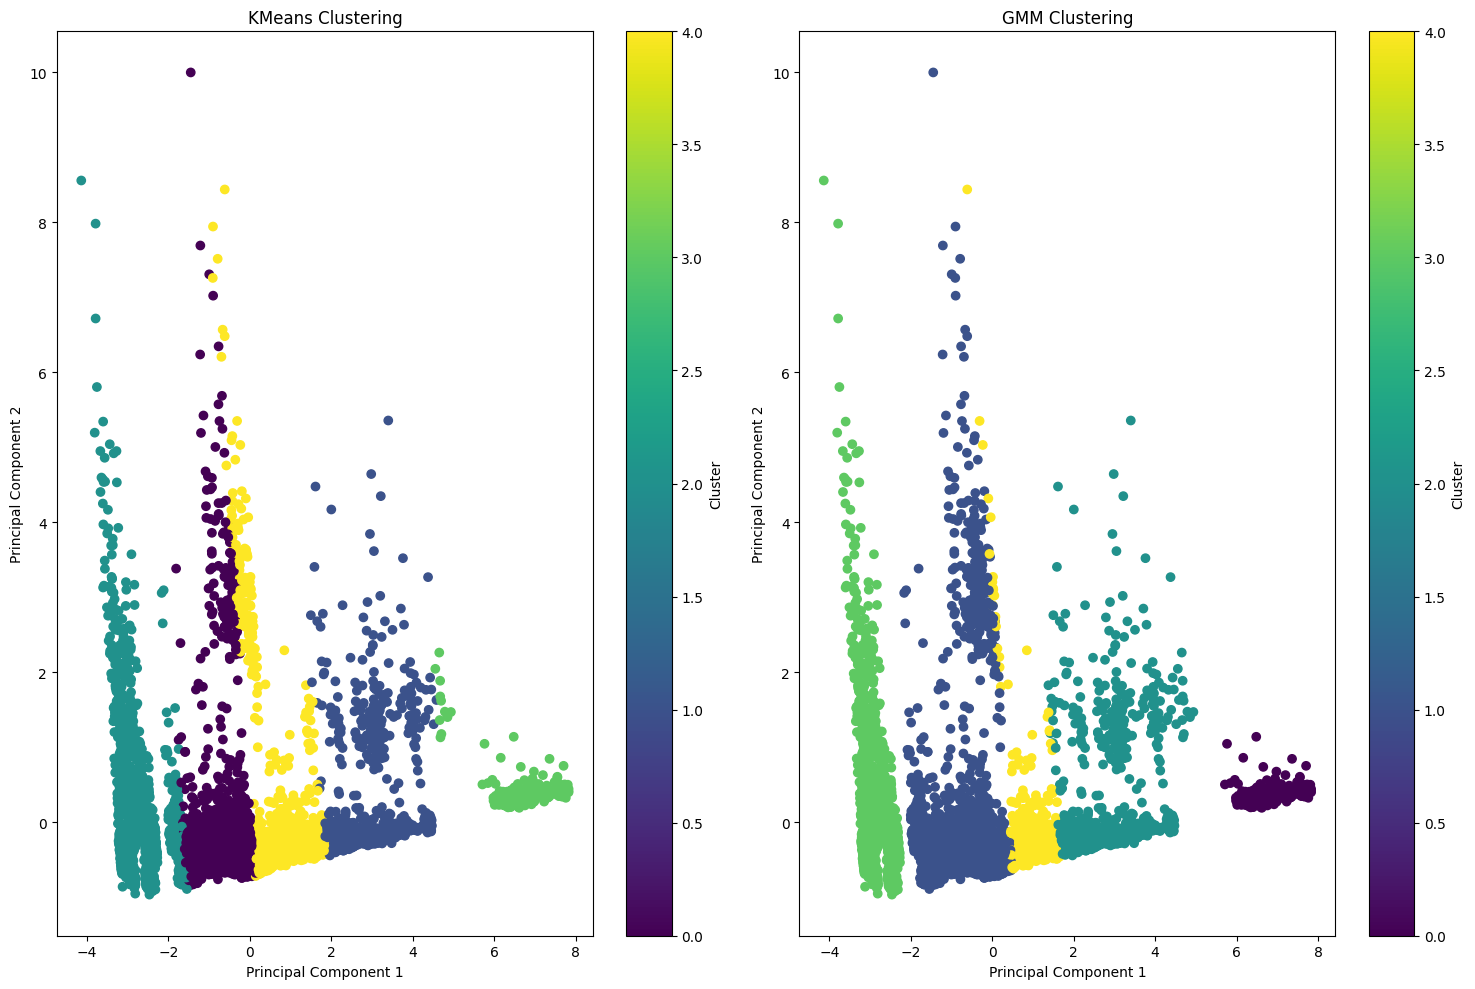

In [155]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA  

# Initializing an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fitting and transforming the imputer on the scaled features
features_imputed = imputer.fit_transform(features_imputed)

# Now, performing PCA on the imputed features
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_imputed)

# Plotting clusters for KMeans
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

# Plotting clusters for GMM
plt.subplot(1, 2, 2)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


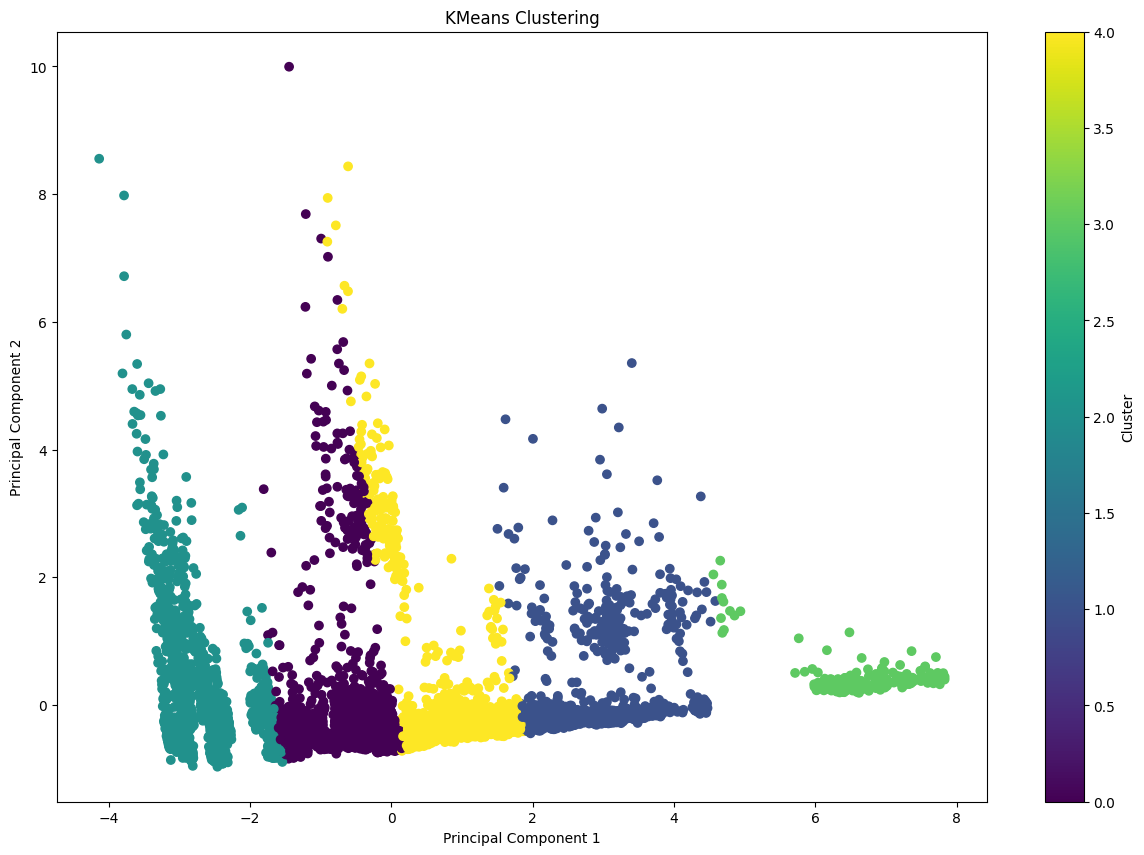

In [156]:
plt.figure(figsize=(15, 10))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

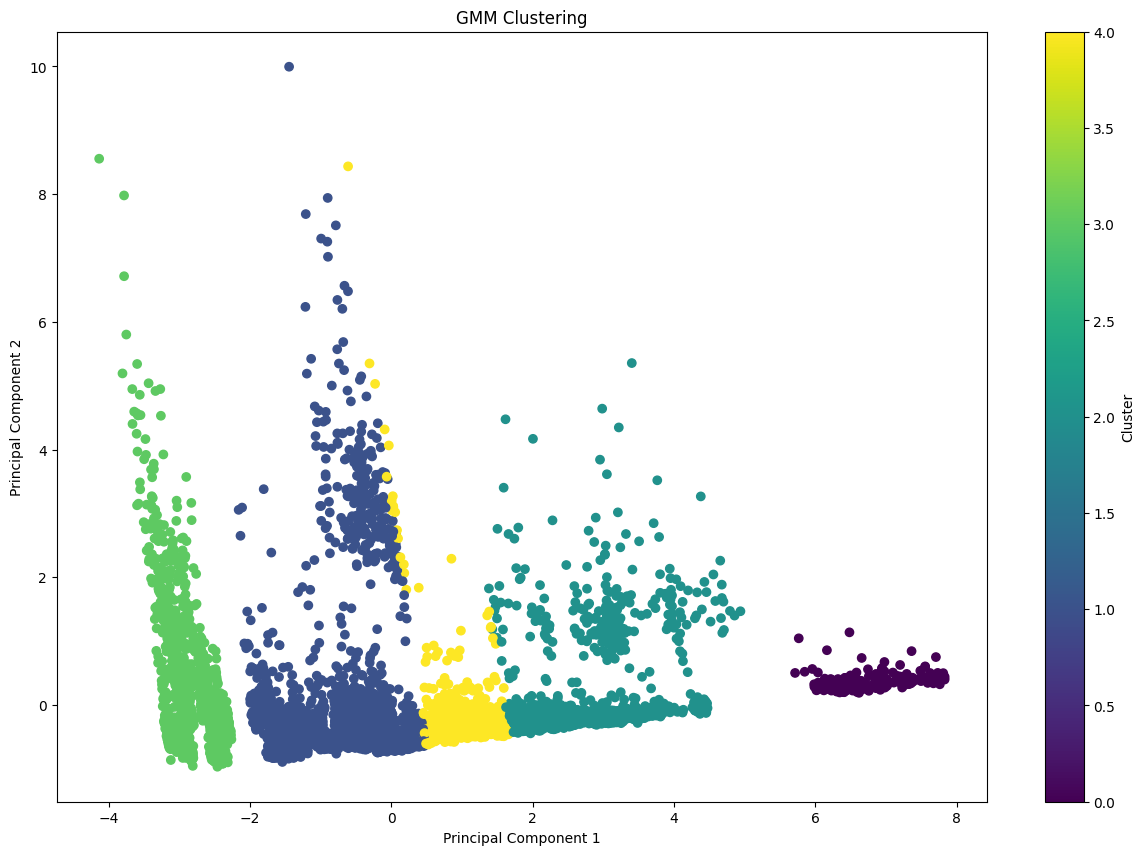

In [157]:
plt.figure(figsize=(15, 10))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
